In [2]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import matplotlib
from sklearn.manifold import TSNE
import seaborn as sns
from astropy.table import Table, Column
import hdbscan
import csv
import json
import pickle
%matplotlib widget
%matplotlib inline
%matplotlib ipympl

In [3]:
#!pip install ipympl

In [77]:
# File path for feature data #
filepath = "/Users/swebb/Documents/for_test_michelle/feats_lists/2016_07_ngc6101_160726.ascii"



In [78]:
# read in the ascii file #
LC_name = np.loadtxt(filepath, dtype= 'str', usecols = 0, skiprows=1)
Autocor_length, Beyond1Std, CAR_sigma, CAR_mean, CAR_tau,Con, Eta_e, LinearTrend, MaxSlope, Mean, Meanvariance, MedianAbsDev, MedianBRP, PairSlopeTrend, PercentAmplitude, Q31, Rcs, Skew, SlottedA_length, SmallKurtosis, Std, StetsonK_AC, Amplitudes, VariabilityIndex = np.loadtxt(filepath, unpack = True, usecols = (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23, 24), skiprows=1)
#Autocor_length, Beyond1Std, CAR_sigma, CAR_mean, CAR_tau,Con, Eta_e, LinearTrend, MaxSlope, Mean, Meanvariance, MedianAbsDev, MedianBRP, PairSlopeTrend, PercentAmplitude, Q31, Rcs, Skew, SlottedA_length, SmallKurtosis, Std, StetsonK_AC, Amplitudes  = np.loadtxt(filepath, unpack = True, usecols = (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23), skiprows=1)

In [79]:
#create dictionary of the features#

dict = {'Filename': LC_name, 'Autocor_length': Autocor_length, 
        'Beyond1Std' : Beyond1Std, 'CAR_sigma': CAR_sigma, 
        'CAR_mean': CAR_mean, 'CAR_tau':CAR_tau, 'Con':Con, 
        'Eta_e': Eta_e, 'LinearTrend': LinearTrend, 
        'MaxSlope':MaxSlope, 'Mean' : Mean, 
        'Meanvariance': Meanvariance, 'MedianAbsDev': MedianAbsDev,
        'MedianBRP' : MedianBRP, 'PairSlopeTrend' : PairSlopeTrend, 
        'PercentAmplitude' : PercentAmplitude, 'Q31':Q31, 'Rcs':Rcs,
        'Skew':Skew, 'SlottedA_length' :SlottedA_length,
        'SmallKurtosis':SmallKurtosis, 'Std':Std, 
        'StetsonK_AC':StetsonK_AC, 'Amplitudes':Amplitudes, 'VariabilityIndex': VariabilityIndex}
'''
dict = {'Filename': LC_name, 'Autocor_length': Autocor_length, 
        'Beyond1Std' : Beyond1Std, 'CAR_sigma': CAR_sigma, 
        'CAR_mean': CAR_mean, 'CAR_tau':CAR_tau, 'Con':Con, 
        'Eta_e': Eta_e, 'LinearTrend': LinearTrend, 
        'MaxSlope':MaxSlope, 'Mean' : Mean, 
        'Meanvariance': Meanvariance, 'MedianAbsDev': MedianAbsDev,
        'MedianBRP' : MedianBRP, 'PairSlopeTrend' : PairSlopeTrend, 
        'PercentAmplitude' : PercentAmplitude, 'Q31':Q31, 'Rcs':Rcs,
        'Skew':Skew, 'SlottedA_length' :SlottedA_length,
        'SmallKurtosis':SmallKurtosis, 'Std':Std, 
        'StetsonK_AC':StetsonK_AC, 'Amplitudes':Amplitudes}
        '''

"\ndict = {'Filename': LC_name, 'Autocor_length': Autocor_length, \n        'Beyond1Std' : Beyond1Std, 'CAR_sigma': CAR_sigma, \n        'CAR_mean': CAR_mean, 'CAR_tau':CAR_tau, 'Con':Con, \n        'Eta_e': Eta_e, 'LinearTrend': LinearTrend, \n        'MaxSlope':MaxSlope, 'Mean' : Mean, \n        'Meanvariance': Meanvariance, 'MedianAbsDev': MedianAbsDev,\n        'MedianBRP' : MedianBRP, 'PairSlopeTrend' : PairSlopeTrend, \n        'PercentAmplitude' : PercentAmplitude, 'Q31':Q31, 'Rcs':Rcs,\n        'Skew':Skew, 'SlottedA_length' :SlottedA_length,\n        'SmallKurtosis':SmallKurtosis, 'Std':Std, \n        'StetsonK_AC':StetsonK_AC, 'Amplitudes':Amplitudes}\n        "

In [80]:
#Put dictionary into a pandas datadframe #
df = pd.DataFrame(dict)
print(len(df))

12087


In [81]:
#Define what features to use in the clustering, don't cluster on the targert/ID names! # 
features = ['Autocor_length', 'Beyond1Std', 'CAR_sigma', 'CAR_mean', 
            'CAR_tau', 'Con', 'Eta_e', 'LinearTrend', 'MaxSlope', 
            'Mean', 'Meanvariance', 'MedianAbsDev', 'MedianBRP', 
            'PairSlopeTrend', 'Q31', 'Rcs', 'Skew', 'SlottedA_length',
            'SmallKurtosis', 'Std', 'StetsonK_AC', 'Amplitudes', 'VariabilityIndex']
#features1 = ['Autocor_length', 'Beyond1Std', 'CAR_sigma', 'CAR_mean', 
          #  'CAR_tau', 'Con', 'Eta_e', 'LinearTrend', 'MaxSlope', 
           # 'Mean', 'Meanvariance', 'MedianAbsDev', 'MedianBRP', 
            #'PairSlopeTrend', 'Q31', 'Rcs', 'Skew', 'SlottedA_length',
            #'SmallKurtosis', 'Std', 'StetsonK_AC', 'Amplitudes']

In [82]:
## Separating out the features:
x = df.loc[:, features].values
## Separating out the LC names:
y = df.loc[:,['Filename']].values
# Standardise the features
x = StandardScaler().fit_transform(x)

In [83]:
## Simple 2D component breakdown ##

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns =['PC1', 'PC2'])
finalDf = pd.concat([principalDf, df[['Filename']]], axis =1)

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA of ngc6101 2016/07 data', fontsize =20)

ax.scatter(finalDf['PC1'], finalDf[ 'PC2'], s = 50)
ax.grid()
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [84]:
print('------COMPONENTS ----')
fig = plt.figure(figsize=(8,8))
#print(pca.components_[:1,:])
pc1 =  (0.0166094 ,  0.040229 ,   0.28447284 , 0.00474769,
        -0.18402165, -0.01236689,
   0.14796383, -0.00199655,  0.32195174 , 0.21171048 ,
        0.40140199,  0.40051047,
  -0.08088764,  0.02756144,  0.40976596,  0.13336626,
        0.02997831  ,0.08584026,
  -0.01649471,  0.41324495,  0.07952099 , 0.08242559 , 0.07623893)
plt.bar(features, pc1,  alpha =0.5, color='red', label='PC1')
plt.xticks(rotation=90)
plt.title('Princple component 1')

#print(pca.components_[1:2,:])
pc2 =  (0.04721767 ,-0.47000535,  0.11625877, -0.00977346,
        -0.01975806,  0.13128532,
  -0.02674583 ,-0.00277042 , 0.20431709 ,-0.15674878 , 0.1244623 , -0.09042418,
   0.5159207,  -0.00432509, -0.07645283 ,-0.04073734 , 0.17343386, -0.00775881,
   0.48430314 , 0.09975282, -0.3195878  , 0.02873393 , 0.06018684)
plt.bar(features, pc2, alpha =0.5, color='purple', label='PC2')
plt.xticks(rotation=90)
plt.legend()
plt.title('Princple components')

------COMPONENTS ----


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Text(0.5, 1.0, 'Princple components')

In [85]:
### PCA on all of the features ###

pca_all =PCA(n_components=22)
principalComponents_all = pca_all.fit_transform(x)

#print(principalComponents_all)
labels = np.arange(1,23)
print('labels: ' + str(len(labels)))
variance_4_comp = pca_all.explained_variance_
print('Variance: ' + str(len(variance_4_comp)))

plt.scatter(labels, variance_4_comp)
plt.xlabel('Features')
plt.ylabel('Variance')
plt.xticks(rotation=90)
plt.rc('xtick',labelsize=10)

plt.show()

labels: 22
Variance: 22


In [86]:
def myplot(score, coeff, labels=None):
        xs = score[:,0]
        ys = score[:,1]
        n = coeff.shape[0]
        scalex = 1.0/(xs.max() - xs.min())
        scaley = 1.0/(ys.max() - ys.min())
        plt.scatter(xs*scalex, ys*scaley, c ='b' , alpha =0.3)
        for i in range(n):
                plt.arrow(0,0, coeff[i,0], coeff[i,1], color = 'r', alpha =0.7)
                if labels is None:
                        plt.text(coeff[i,0]*1.15, coeff[i,1] *1.15, "Var"+str(i+1), color="hotpink", ha = 'center', va = 'center')
                else:
                        plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
fig = plt.figure(figsize=(8,8))
plt.xlim(-1,1)
plt.ylim(-1, 1)
plt.xlabel("PC{}".format(1))
plt.ylabel("PC{}".format(2))
plt.grid()
myplot(principalComponents_all[:,0:2],np.transpose(pca_all.components_[0:2, :]), labels=features1)
plt.show()
print(features1)


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

NameError: name 'features1' is not defined

------COMPONENTS ----


ValueError: shape mismatch: objects cannot be broadcast to a single shape

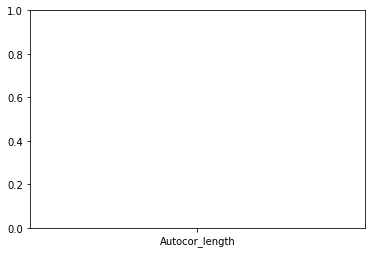

In [47]:
# Get the importance of all the features in each components #
print('------COMPONENTS ----')
#print(pca_all.components_[:1,:])
pc1 =  (0.26132894, -0.14521633,  0.14814397, -0.08427581,  
        0.02988394,  0.215117 , -0.27075878, -0.32196506,  
        0.17205122, -0.24522452 , 0.18046495,  0.06154252,
        0.01337959 ,-0.23859501,  0.17809925,  0.30552599 , 
        0.1966353 ,  0.2575232, -0.20022322 , 0.29572335 , 0.20052273 , 0.27646281)
plt.bar(features, pc1)
plt.xticks(rotation=90)
plt.title('Princple component 1')


------COMPONENTS ----


ValueError: shape mismatch: objects cannot be broadcast to a single shape

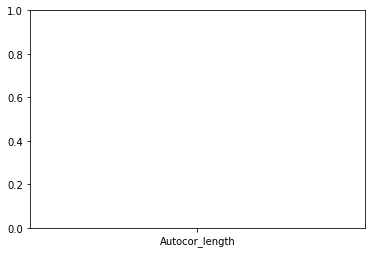

In [48]:
# Get the importance of all the features in each components #
print('------COMPONENTS ----')
#print(pca_all.components_[1:2,:])
pc2 =  (-0.1413438,  -0.36991466, -0.0055099,  -0.11337985 , 0.00079999
        ,-0.04529704, 0.17110515,  0.04390896,  0.34978962, -0.19345926 
        ,0.24570145, -0.04268682, 0.40378006, -0.18346452, -0.05246098 
        ,-0.22169885, -0.03146811, -0.15560248, 0.33301164,  0.15765741
        ,-0.34637078 , 0.21341004)
plt.bar(features, pc2)
plt.xticks(rotation=90)
plt.title('Princple component 2')

------COMPONENTS ----
[[ 1.95505060e-01 -8.05803317e-02 -2.02973440e-01  5.84503420e-02
   7.67354946e-02  5.29695627e-02  1.68973444e-01  9.80920696e-02
   1.75086162e-01 -2.26483525e-01  1.82393627e-01 -1.69719181e-01
  -2.35934212e-01 -1.96193813e-05 -1.79348563e-01  4.70154208e-01
   1.77974011e-01  2.63801950e-01  6.25679443e-02  1.80638555e-01
   3.95952759e-01  6.98813152e-02 -3.33812325e-01]]


ValueError: shape mismatch: objects cannot be broadcast to a single shape

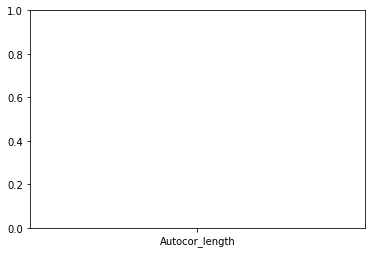

In [49]:
# Get the importance of all the features in each components #
print('------COMPONENTS ----')
print(pca_all.components_[2:3,:])
pc3 =  (-0.01250732, -0.1888112,   0.30593304,  0.04654162,
        -0.01948,    -0.10107737, 0.09421463 , 0.00363171  ,0.22627515,
        0.32572041, -0.3678394,   0.16018938,0.02937528,  0.35142125,
        0.30015345 , 0.06645494 ,-0.40764671 , 0.00486957, -0.03814393,
        0.29412259,  0.04963976 , 0.2349287)
plt.bar(features, pc3)
plt.xticks(rotation=90)
plt.title('Princple component 3')

------COMPONENTS ----
[[ 0.3699228  -0.16109743  0.30255982 -0.0082021  -0.27736235  0.37452118
  -0.13011105  0.02654358 -0.1104483  -0.1468788  -0.09809939  0.12685055
   0.26685237 -0.03528603  0.1199591   0.21315386 -0.39604933  0.086753
   0.3210655  -0.10060518 -0.03070332  0.1020007  -0.17339645]]


ValueError: shape mismatch: objects cannot be broadcast to a single shape

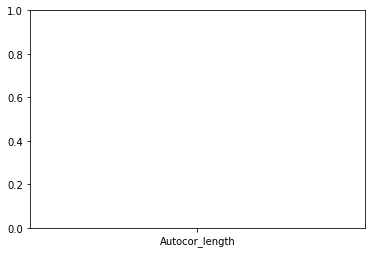

In [50]:
# Get the importance of all the features in each components #
print('------COMPONENTS ----')
print(pca_all.components_[3:4,:])
pc4 =  (-0.36500808,  0.11102206,  0.31667165,  0.18967577,
        -0.01250468,-0.34198039, 0.25781307, -0.12615558, -0.02080753,
        -0.17402532 , 0.16957582 , 0.17778213,-0.25626858, -0.14784769,
        0.29920654, -0.08915444 , 0.27888003, -0.34739069,-0.15213686
        ,0.09320356 , 0.1109948,  -0.00175154)
plt.bar(features, pc4)
plt.xticks(rotation=90)
plt.title('Princple component 4')

------COMPONENTS ----
[[ 0.42726634 -0.23634771 -0.11092795 -0.11366542  0.11497849  0.36981612
  -0.37443505  0.08796253 -0.02596521 -0.08210401 -0.01421977  0.10863852
  -0.07270138 -0.14655297  0.11332951 -0.08621981  0.42345877 -0.06589513
  -0.39830023 -0.00913099 -0.04493845 -0.07003539  0.15054736]]


ValueError: shape mismatch: objects cannot be broadcast to a single shape

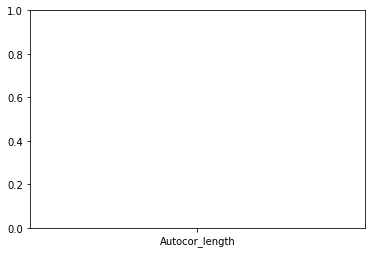

In [51]:
# Get the importance of all the features in each components #
print('------COMPONENTS ----')
print(pca_all.components_[4:5,:])
pc5 =  (-0.03540501,  0.02214542, -0.32984125, -0.71076117,  0.1137284,
        -0.19854558,-0.04627833,  0.07381334 , 0.00312945, -0.0082417 ,
        0.00961663,  0.5176934,-0.16442917,  0.01019822, 0.15720808,
        0.0407381,  -0.00534223, -0.0203488,0.02745804,  0.01256121,
        -0.02734691, -0.02325941)
plt.bar(features, pc5)
plt.xticks(rotation=90)
plt.title('Princple component 5')

------COMPONENTS ----
[[-0.09881437 -0.0554615  -0.09222786  0.07591959 -0.4839755  -0.19740558
  -0.14543599 -0.6754803  -0.07453734 -0.00257484 -0.05790419 -0.07452849
   0.01341304 -0.09533401  0.34251949  0.14929995  0.06928614 -0.07144792
   0.15904467  0.07382866  0.13418376 -0.01607879]]


Text(0.5, 1.0, 'Princple component 6')

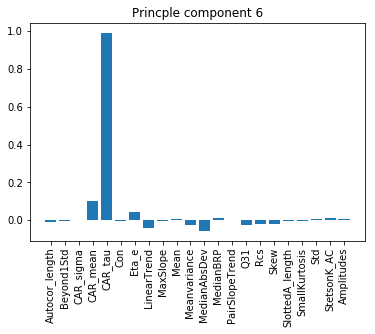

In [216]:
# Get the importance of all the features in each components #
print('------COMPONENTS ----')
print(pca_all.components_[5:6,:])
pc6 =  (-0.00732989, -0.00241138 , 0.00139991 , 0.10215262 , 
        0.99027875, -0.00396059, 0.04168268, -0.0392662,
        -0.00277732,  0.00936469, -0.0246707 , -0.05496338,
       0.01411709,  0.00383673, -0.02295952, -0.01971613,
        -0.02164847, -0.00465482, -0.00404924 , 0.00689622  ,0.00990455 , 0.00700622)
plt.bar(features, pc6)
plt.xticks(rotation=90)
plt.title('Princple component 6')

------COMPONENTS ----
[[ 1.19877966e-02 -2.55003045e-02 -4.98547584e-02  9.35657688e-01
   2.10411688e-03  1.31457257e-01 -1.57424405e-01  6.23652705e-02
  -5.58857489e-03  6.27334580e-02 -6.78714089e-03 -7.48074661e-03
  -1.02954464e-04  2.36489015e-01  1.58456643e-02 -4.97564234e-02
  -6.62884889e-02 -7.90581435e-02 -1.28601948e-02 -1.31580813e-03
  -3.64767496e-02  2.10545045e-02]]


Text(0.5, 1.0, 'Princple component 7')

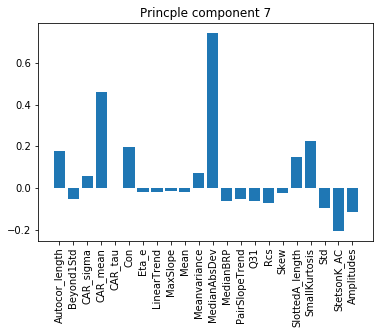

In [217]:
# Get the importance of all the features in each components #
print('------COMPONENTS ----')
print(pca_all.components_[6:7,:])
pc7 =  ( 1.76100732e-01, -5.10755589e-02,  5.84776838e-02,
        4.59189657e-01,4.64488649e-04,  1.96312141e-01,
        -1.74605762e-02, -1.71406635e-02, -1.66223464e-02,
        -1.87363952e-02,  7.18746915e-02,  7.43089142e-01,
        -6.22860164e-02, -5.16898121e-02, -6.44171115e-02,
        -7.42368982e-02, -2.56991008e-02 , 1.49780176e-01 ,
        2.25122155e-01, -9.73831776e-02,-2.04672624e-01,
        -1.16755861e-01)
plt.bar(features, pc7)
plt.xticks(rotation=90)
plt.title('Princple component 7')

------COMPONENTS ----
[[ 0.01228851  0.04270602  0.22859684  0.31826925 -0.00495069 -0.11244241
   0.44118527  0.03168797  0.01412926 -0.13917803  0.01905105  0.0674438
   0.0130596  -0.75972079  0.02341937  0.01932949  0.00935203  0.16449293
  -0.0068826   0.01763906 -0.03997755 -0.06561097]]


Text(0.5, 1.0, 'Princple component 8')

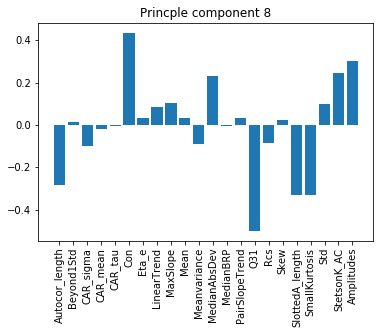

In [218]:
# Get the importance of all the features in each components #
print('------COMPONENTS ----')
print(pca_all.components_[7:8,:])
pc8 =  (-0.28430493,  0.01628589, -0.09998039, -0.02086403,
        -0.00621802,  0.43501204,0.03209451,  0.08578987 ,
        0.10439317 , 0.03187896, -0.08802104,  0.23326698,
  -0.00415665,  0.03200133, -0.49977511, -0.08716914,  0.02578845 ,
        -0.33060224, -0.32921124,  0.09926823,  0.24352055,  0.30136398 )
plt.bar(features, pc8)
plt.xticks(rotation=90)
plt.title('Princple component 8')

------COMPONENTS ----
[[-0.11661512  0.04548565  0.0892655  -0.01915641  0.12474221  0.51743256
   0.40287325 -0.53242024  0.05454953 -0.04247056  0.0415412  -0.1369467
   0.03565825  0.12041846 -0.30192048 -0.02771029 -0.31095517 -0.08502643
   0.03875268 -0.03489359 -0.08032996  0.0295157 ]]


Text(0.5, 1.0, 'Princple component 9')

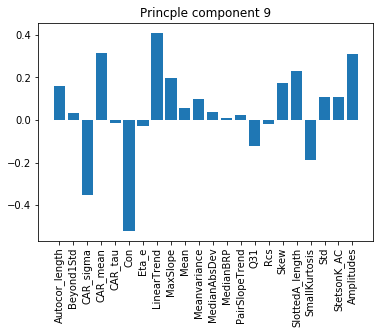

In [219]:
# Get the importance of all the features in each components #
print('------COMPONENTS ----')
print(pca_all.components_[8:9,:])
pc9 =  (0.15994707,  0.03508963, -0.35333694,  0.3164524 , 
        -0.01425166, -0.52033743,-0.02882326,  0.40898865,
        0.199118,    0.05525928,  0.09686097 , 0.03830456,
   0.00764297,  0.02265553, -0.12426383, -0.0171806,   0.17501313,
        0.23017823,-0.18825593 , 0.10699513  ,0.10656252 , 0.31213017  )
plt.bar(features, pc9)
plt.xticks(rotation=90)
plt.title('Princple component 9')

------COMPONENTS ----
[[ 0.25653369  0.06178119 -0.00825463  0.08411259  0.18133256 -0.50816807
   0.10069629 -0.38624576  0.03111987  0.03640933  0.02544951  0.09219839
  -0.03439585  0.24572509 -0.32048078 -0.17305325  0.21998349  0.3583911
  -0.19813204 -0.06881918 -0.16534059 -0.13769644]]


Text(0.5, 1.0, 'Princple component 10')

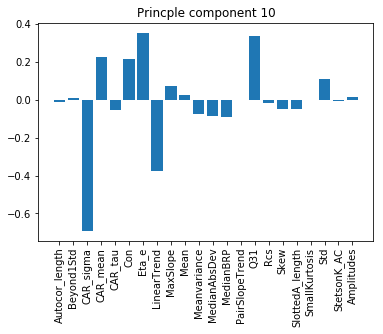

In [220]:
print('------COMPONENTS ----')
print(pca_all.components_[9:10,:])
pc10 =  (-0.01191264 , 0.01232625, -0.69073317,  0.2258535,
         -0.05128081 , 0.21408627,  0.35296845 ,-0.37547942,
         0.07564984 , 0.02450542, -0.07357075, -0.08521129,
  -0.08923301, -0.00225734,  0.33520204, -0.01575761, -0.05079858,
         -0.04990487,  -0.00214581,  0.11195321, -0.00860116,  0.01712891  )
plt.bar(features, pc10)
plt.xticks(rotation=90)
plt.title('Princple component 10')

------COMPONENTS ----
[[-0.05190462 -0.00763957 -0.2910586  -0.00138854 -0.15681098 -0.21790563
   0.56466624  0.22726178 -0.02707246  0.02210939 -0.03261404 -0.25215581
   0.16954962  0.31976963  0.35044458 -0.02667486 -0.26657804  0.17399526
   0.09265188  0.07879782 -0.13215182 -0.12639499]]


Text(0.5, 1.0, 'Princple component 11')

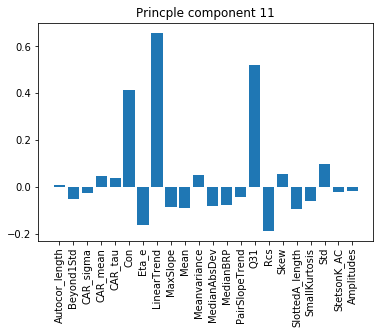

In [221]:
print('------COMPONENTS ----')
print(pca_all.components_[10:11,:])
pc11 =  ( 0.00992906, -0.05056048, -0.02326877,  0.04677807 ,
         0.0370097 ,  0.41303567,
  -0.16198835,  0.65755795, -0.08640603, -0.0874032,   0.0533093,
         -0.07847798,
  -0.07473888, -0.04146761,  0.52170017, -0.18572259,  0.05422287,
         -0.09399525,
  -0.06047745 , 0.09905359, -0.01901921, -0.01852207   )
plt.bar(features, pc11)
plt.xticks(rotation=90)
plt.title('Princple component 11')

------COMPONENTS ----
[[-0.0482942  -0.11969632 -0.2173772   0.01796532 -0.05634607  0.35507412
   0.32497749  0.00997281 -0.02043833 -0.00754485 -0.02582086 -0.02168234
  -0.25497579  0.07399184  0.13673895 -0.12475041  0.70364236 -0.00921617
  -0.22964754  0.01872836  0.19226534 -0.09587063]]


Text(0.5, 1.0, 'Princple component 12')

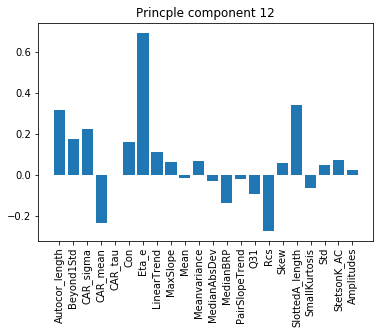

In [222]:
print('------COMPONENTS ----')
print(pca_all.components_[11:12,:])
pc12 =  (0.31859279,  0.17517269,  0.22535865, -0.23446157,
         -0.00115889,  0.16242021,
   0.69269237 , 0.11303505,  0.06486104, -0.01233714,  0.06895661,
         -0.02989477,
  -0.13533211 ,-0.01850737, -0.09094936, -0.26992339 , 0.05824348,
         0.34229438,
  -0.06274282,  0.04891284 , 0.07494275 , 0.02782468  )
plt.bar(features, pc12)
plt.xticks(rotation=90)
plt.title('Princple component 12')

------COMPONENTS ----
[[ 0.03497802  0.00207199  0.58328677  0.00464682  0.02136799 -0.06932977
   0.04040788  0.03019137  0.07177381 -0.40170901  0.07269588  0.03143717
  -0.00737226  0.28977862  0.15384468  0.00100243 -0.01137746 -0.1730078
   0.00228489  0.09849284  0.28668424 -0.49827184]]


Text(0.5, 1.0, 'Princple component 13')

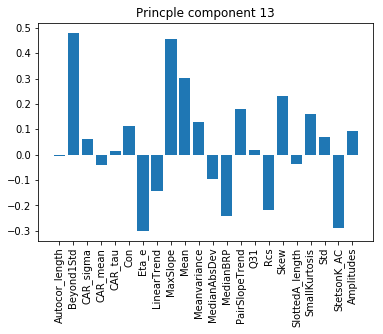

In [223]:
print('------COMPONENTS ----')
print(pca_all.components_[12:13,:])
pc13 =  (-0.00540509,  0.47973157,  0.0610207 , -0.04161662  ,
         0.01519718,  0.1125786,
  -0.29924267, -0.14425922,  0.45681783,  0.30221308,  0.12981976 ,
         -0.09591962,
  -0.2428039 ,  0.18024077,  0.02040238, -0.21632704 , 0.23149419,
         -0.03571164,
   0.16011315  ,0.07038619, -0.28702075 , 0.09247584 )
plt.bar(features, pc13)
plt.xticks(rotation=90)
plt.title('Princple component 13')

------COMPONENTS ----
[[ 0.05434742 -0.65691082 -0.04729988 -0.01134502  0.46088226 -0.10197666
   0.01343934 -0.13156391 -0.16034962  0.1781825  -0.16186377 -0.00614681
  -0.13419369 -0.10536438  0.22697833 -0.0807302  -0.26119104 -0.08819832
  -0.16499546 -0.05580531  0.20336294 -0.06563881]]


Text(0.5, 1.0, 'Princple component 14')

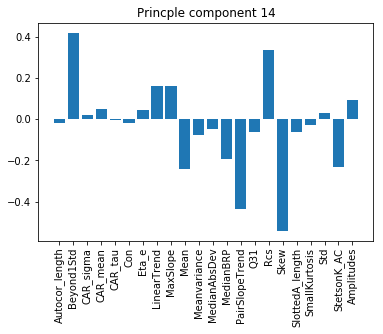

In [224]:
print('------COMPONENTS ----')
print(pca_all.components_[13:14,:])
pc14 =  (-0.01796305 , 0.41717589  ,0.01810961,  0.04847291 ,
         -0.00253264, -0.01976448,
   0.04341766 , 0.16113004,  0.16088082, -0.24360452, -0.07870103,
         -0.04525999,
  -0.19077885 ,-0.43613816, -0.06190451,  0.33297843, -0.53978974,
         -0.0615957,
  -0.02613369,  0.03075655, -0.23255894,  0.09513891)
plt.bar(features, pc14)
plt.xticks(rotation=90)
plt.title('Princple component 14')

------COMPONENTS ----
[[-0.19774143  0.44029997  0.13339669  0.00544533  0.49092373  0.11384718
  -0.11262799 -0.10670288 -0.23020264  0.20850714 -0.23936426 -0.10586543
   0.13311737 -0.01033206  0.37401082  0.0451163   0.17812747  0.20084815
   0.19322132 -0.09669929 -0.08555589 -0.14275812]]


Text(0.5, 1.0, 'Princple component 15')

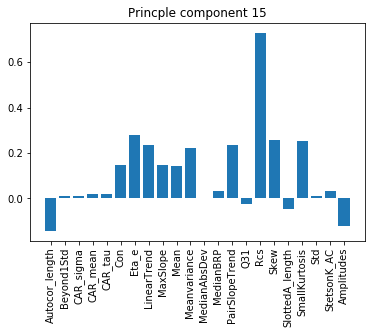

In [225]:
print('------COMPONENTS ----')
print(pca_all.components_[14:15,:])
pc15 =  (-0.14171826,  0.00884735 , 0.01111324 , 0.01897593,
         0.01938684,  0.14558529,
   0.27745843,  0.23468675,  0.14527128,  0.14101773,  0.22196127,
         0.00296234,
   0.03205355,  0.23600901, -0.02645643,  0.72881179 , 0.25624196,
         -0.04495994,
   0.25111224 , 0.0104879 ,  0.0324834 , -0.12230555)
plt.bar(features, pc15)
plt.xticks(rotation=90)
plt.title('Princple component 15')

------COMPONENTS ----
[[-0.53863526 -0.18925217  0.07950682 -0.00719853 -0.15698263  0.09730513
  -0.19765531  0.04871481  0.09234571  0.04108539  0.09083507  0.00445486
  -0.23246652 -0.00162322 -0.09507996 -0.27485473 -0.13081601  0.61033799
   0.09723857  0.04687336  0.08833548 -0.16103971]]


Text(0.5, 1.0, 'Princple component 16')

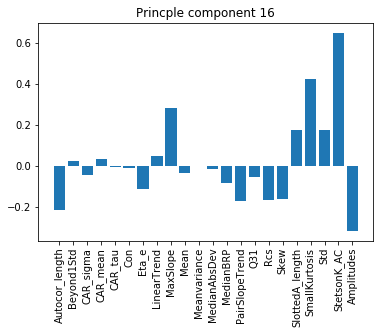

In [226]:
print('------COMPONENTS ----')
print(pca_all.components_[15:16,:])
pc16 =  (-0.21367029 , 0.02277254 ,-0.04221957,  0.03148352,
         -0.00709278, -0.0105132,
  -0.11346545,  0.0489032 ,  0.28308384 ,-0.03318789, -0.0024282 ,
         -0.01562082,
  -0.082436,   -0.16929964 ,-0.05471812, -0.16754721 ,-0.16354317,
         0.17581109,
   0.42527309 , 0.17337454 , 0.64750642, -0.31587582)
plt.bar(features, pc16)
plt.xticks(rotation=90)
plt.title('Princple component 16')

------COMPONENTS ----
[[-0.1258901  -0.15890946 -0.05458073 -0.01159191  0.02701232  0.04449796
  -0.01215719  0.00076676  0.00820294 -0.0703863   0.01218988  0.23660936
  -0.38493875  0.043656    0.04624085  0.5263987   0.01056665 -0.04837574
   0.0108354   0.00428414 -0.61163256 -0.29287251]]


Text(0.5, 1.0, 'Princple component 17')

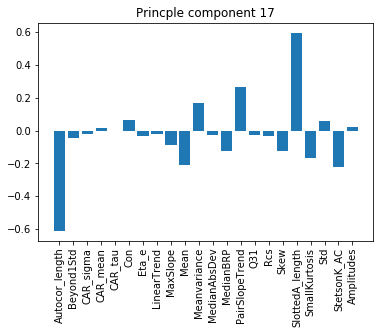

In [227]:
print('------COMPONENTS ----')
print(pca_all.components_[16:17,:])
pc17 =  (-6.09443271e-01, -4.62891745e-02, -1.82685230e-02
         ,  1.40096804e-02,
  -4.30066301e-04 , 6.49754969e-02, -3.50803731e-02 ,-2.33729270e-02,
  -8.74036591e-02, -2.10374602e-01 , 1.65796279e-01, -2.90282443e-02,
  -1.25784320e-01,  2.67252088e-01, -2.52179755e-02, -3.32569528e-02,
  -1.25426763e-01,  5.94550266e-01, -1.66709348e-01,  5.93498368e-02,
  -2.22841829e-01,  2.22986755e-02)
plt.bar(features, pc17)
plt.xticks(rotation=90)
plt.title('Princple component 17')

------COMPONENTS ----
[[-4.38644653e-02 -1.00379412e-01  2.12651983e-01  1.08464786e-04
   7.68182048e-02 -1.66298774e-02 -5.15378900e-02 -3.53573123e-02
  -7.26043321e-02 -5.54061853e-01 -8.32999561e-02 -2.14601647e-01
  -1.11758233e-01  1.16366305e-01  2.38750280e-01 -1.38773073e-02
   4.65853246e-02  1.94238488e-01 -1.95029990e-01 -2.02583738e-02
  -2.21952378e-01  5.97170337e-01]]


Text(0.5, 1.0, 'Princple component 18')

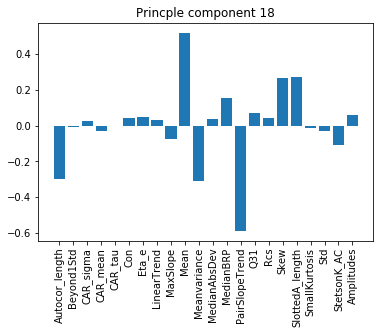

In [228]:
print('------COMPONENTS ----')
print(pca_all.components_[17:18,:])
pc18 =  (-2.97317174e-01, -5.78390500e-03,  2.82615132e-02,
         -3.02701660e-02,
  -3.19140486e-05,  4.39871596e-02,  4.67596778e-02 , 3.37014434e-02,
  -7.31074022e-02,  5.16665977e-01, -3.10451572e-01 , 3.44419768e-02,
   1.56024919e-01, -5.86183805e-01,  7.24860983e-02 , 4.25278252e-02,
   2.64722575e-01,  2.70761467e-01, -1.14391098e-02 ,-3.08538451e-02,
  -1.08493797e-01,  5.89954285e-02)
plt.bar(features, pc18)
plt.xticks(rotation=90)
plt.title('Princple component 18')

------COMPONENTS ----
[[-3.41296865e-01 -4.19975381e-03 -2.94361922e-01  1.84452442e-02
   1.15690469e-01  1.53510032e-02  7.30925508e-03 -5.46818926e-02
  -5.96774389e-02 -3.21776050e-01 -6.34422459e-03  5.60353340e-01
   5.02610449e-01  3.94068134e-02  7.43859466e-03  1.24298140e-01
  -2.77736232e-02  5.91098369e-02 -2.53881047e-01  1.88814245e-04
   1.42463638e-01 -4.05663234e-03]]


Text(0.5, 1.0, 'Princple component 19')

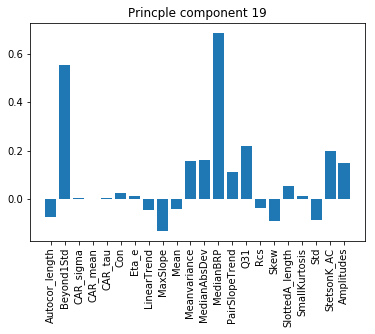

In [229]:
print('------COMPONENTS ----')
print(pca_all.components_[18:19,:])
pc19 =  (-7.67137543e-02 , 5.53703963e-01,  4.47105218e-03 ,
         -2.31007943e-04,
   1.34609584e-03,  2.35430135e-02 , 1.07617497e-02 ,-4.55872185e-02,
  -1.32167474e-01 ,-4.07791627e-02 , 1.58213353e-01,  1.59249349e-01,
   6.87313665e-01,  1.12099168e-01,  2.19724148e-01 ,-3.90196657e-02,
  -9.37857843e-02,  5.32657935e-02,  1.04019954e-02 ,-8.82614530e-02,
   1.97526226e-01,  1.48048418e-01)
plt.bar(features, pc19)
plt.xticks(rotation=90)
plt.title('Princple component 19')

------COMPONENTS ----
[[ 0.18663382  0.10180942 -0.23089381 -0.01077297  0.09664067  0.01471105
   0.05884723 -0.0414437  -0.04404437 -0.2945618  -0.0570025   0.42581577
  -0.32199973  0.01347169  0.11524646 -0.40045043 -0.08086541 -0.0682589
   0.56271272 -0.06144922  0.00720912  0.06468106]]


Text(0.5, 1.0, 'Princple component 20')

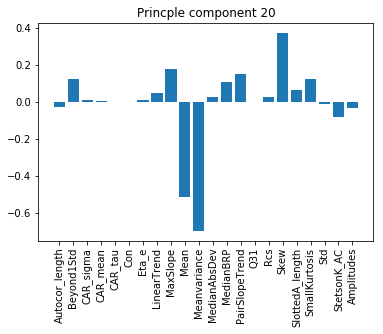

In [230]:
print('------COMPONENTS ----')
print(pca_all.components_[19:20,:])
pc20 =  (-2.85904091e-02 , 1.24696278e-01,  8.29063557e-03 ,
         6.08762688e-03,
  -1.24272115e-03, -3.18760375e-03,  1.22810809e-02,  4.62963991e-02,
   1.76768625e-01, -5.15670115e-01, -6.95684545e-01,  2.64175757e-02,
   1.05860953e-01 , 1.48132902e-01,  5.44261547e-04 , 2.61165134e-02,
   3.71503524e-01,  6.53368331e-02,  1.25497248e-01 ,-1.13450995e-02,
  -8.01330304e-02, -3.11198937e-02)
plt.bar(features, pc20)
plt.xticks(rotation=90)
plt.title('Princple component 20')

------COMPONENTS ----
[[ 1.09080646e-02  6.00587069e-03  7.47272789e-03 -7.38452563e-04
   1.70338139e-02  3.92031495e-04  2.21589225e-03  2.27089557e-02
  -6.21134988e-01 -2.20743633e-02 -2.13580844e-02 -9.50866277e-03
  -3.42072931e-02  5.32532731e-03 -2.23690665e-01 -2.05189658e-02
   1.02528245e-02 -7.72020081e-04  3.58562509e-02  7.47350527e-01
  -2.28464592e-02  5.64929845e-03]]


Text(0.5, 1.0, 'Princple component 21')

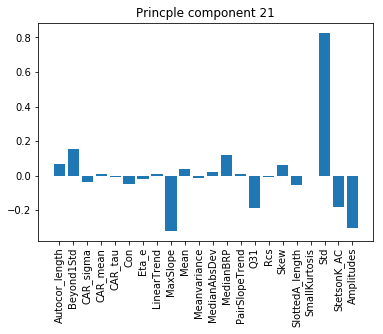

In [231]:
print('------COMPONENTS ----')
print(pca_all.components_[20:21,:])
pc21 =(0.06937795,  0.15622852 ,-0.03827962,  0.0098518 , -0.006525,
       -0.05059171,
  -0.01935995 , 0.01195105, -0.31832182,  0.03798478 ,-0.01638643,
       0.0188015,
   0.11977366 , 0.00858416, -0.18630231, -0.00519621,  0.05933399,
       -0.05664753,
  -0.00463964 , 0.82571362, -0.18384712 ,-0.30198493)
plt.bar(features, pc21)
plt.xticks(rotation=90)
plt.title('Princple component 21')

------COMPONENTS ----
[[-2.68594400e-04  1.70333860e-04 -3.33658477e-03 -3.28465365e-05
   7.55018726e-03 -6.26003536e-04  2.21573808e-03 -6.76949017e-03
  -4.88044944e-01  6.41594564e-03  7.90522817e-01 -3.56815045e-02
  -7.12590773e-03 -1.73790469e-04  9.46171389e-02 -7.42195404e-03
  -5.81762604e-04 -6.07777723e-03  1.07635904e-03 -3.55433715e-01
   6.85407639e-04 -4.66648651e-03]]


Text(0.5, 1.0, 'Princple component 22')

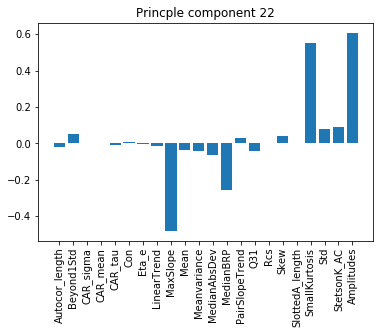

In [232]:
print('------COMPONENTS ----')
print(pca_all.components_[21:22,:])
pc22 =(-0.0210617 ,  0.05107705 , 0.00169454,  0.00077253,
       -0.00564818 , 0.00906014,
  -0.00517877 ,-0.01152266, -0.47889768, -0.03471712, -0.03911197,
       -0.06146297,
  -0.25671038 , 0.03127301 ,-0.04099615  ,0.0053717  , 0.0389781,
       0.00278256,
   0.55453402,  0.08064263 , 0.09019868 , 0.60708564)
plt.bar(features, pc22)
plt.xticks(rotation=90)
plt.title('Princple component 22')

------COMPONENTS ----
[]


Text(0.5, 1.0, 'Princple component 23')

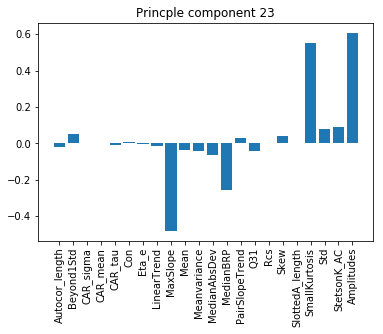

In [233]:
print('------COMPONENTS ----')
print(pca_all.components_[22:23,:])
pc23 =(-0.0210617,   0.05107705,  0.00169454 , 0.00077253,
       -0.00564818,  0.00906014,
  -0.00517877, -0.01152266, -0.47889768, -0.03471712, -0.03911197,
       -0.06146297,
  -0.25671038 , 0.03127301 ,-0.04099615 , 0.0053717  , 0.0389781,
       0.00278256,
   0.55453402,  0.08064263 , 0.09019868  ,0.60708564)
plt.bar(features, pc23)
plt.xticks(rotation=90)
plt.title('Princple component 23')

In [87]:
# Testing HDBSCAN for clustering #
#clusterer = hdbscan.HDBSCAN(cluster_selection_method='leaf')
clusterer = hdbscan.HDBSCAN()
hdbscan_result = clusterer.fit(x)

In [88]:
hdbscan_result.labels_
hdbscan_result.labels_.max()
labels = hdbscan_result.labels_
n_clusters_ = len(set(labels))-(1 if -1 in labels else 0)
print(n_clusters_)


4


In [89]:
print(hdbscan_result)
fig = plt.figure(figsize=(12,12))
clusterer.condensed_tree_.plot()

HDBSCAN(algorithm='best', allow_single_cluster=False, alpha=1.0,
    approx_min_span_tree=True, cluster_selection_method='eom',
    core_dist_n_jobs=4, gen_min_span_tree=False, leaf_size=40,
    match_reference_implementation=False, memory=Memory(cachedir=None),
    metric='euclidean', min_cluster_size=5, min_samples=None, p=None,
    prediction_data=False)


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [90]:
#combine the features, filenames and cluster number# 

print(np.shape(x))


(12087, 23)


In [91]:
features = x
filenames = np.array(y)
cluster_score = np.array(hdbscan_result.labels_)
cluster_score_reshape = cluster_score.reshape(len(x),1)
filenames_features = np.append(filenames, features ,axis=1)
#print(filenames_features)
filenames_features_clusters = np.append(filenames_features, cluster_score_reshape, axis=1)
print(np.shape(filenames_features_clusters))


(12087, 25)


In [92]:
tsne =TSNE(n_components=2, perplexity=50, n_iter=1000)
tsne_results = tsne.fit_transform(x)

In [93]:
print(np.shape(tsne_results))

(12087, 2)


In [94]:
tsne = tsne_results 
filenames = np.array(y)
cluster_score = np.array(hdbscan_result.labels_)
cluster_score_reshape = cluster_score.reshape(len(x),1)
tsne_filenames = np.append(filenames, tsne, axis=1)
tsne_filenames_clusters = np.append(tsne_filenames,cluster_score_reshape, axis=1 )
print(tsne_filenames_clusters)

[['DWF162408.617-732144.995_160726' -48.123130798339844
  -11.437154769897461 3]
 ['DWF161427.175-732035.800_160726' -15.277521133422852 2.85514235496521
  3]
 ['DWF163608.875-732351.620_160726' 44.10795211791992 34.19124221801758 3]
 ...
 ['DWF161937.420-734359.795_160726' 15.656577110290527 -34.95632553100586
  3]
 ['DWF162049.140-730603.249_160726' -13.490609169006348 -28.0474910736084
  3]
 ['DWF162148.122-721501.650_160726' -68.05107879638672
  -11.196100234985352 3]]


In [95]:
colors = ('purple','b','r','c', 'gray', 'silver', 'melon', 'lavender', 'skyblue', 'midnightblue', 'periwinkle', 'rosybrown', 'firebrick', 'red', 'darksalmon', 'gold', 'olivedrab', 'darkcyan', 'coral', 'darkorange', 'yellowgreen', 'g', 'darkslategray', 'c', 'lime', 'orangered', 'purple', 'crimson', 'm', 'darkorchid', 'pink', 'thistle', 'dodgerblue', 'turquoise', 'plum', 'deeppink', 'navy')
print(len(colors))
#print(tsne_filenames_clusters[:][3:4])

c1 =[]
c2 =[]
c3 =[]
for cluster_num in tsne_filenames_clusters:
    #print(cluster_num[3:4])
    if cluster_num[3:4] == 1:
        c1.append(int(cluster_num[3:4]))
    elif  cluster_num[3:4] == 2:
        c2.append(int(cluster_num[3:4]))
    elif  cluster_num[3:4] == 3:
        c3.append(int(cluster_num[3:4]))

unique_labels = set(labels)


37


In [96]:
fig = plt.figure(figsize=(20,20))
print(np.unique(tsne_filenames_clusters[:,3]))

for cluster in np.unique(tsne_filenames_clusters[:,3]):
    msk = np.where(tsne_filenames_clusters[:,3]==cluster)[0]
    xx = tsne_filenames_clusters[msk,1]
    yy = tsne_filenames_clusters[msk,2]
    plt.scatter(xx,yy, alpha=0.2, label=cluster)
 #   print(point)
   
    #print(point[1:2])
    #print(colors[int(point[3:4]-1)])
  #  plt.scatter(point[1:2], point[2:3], color=str(colors[int(point[3:4]-1)]), alpha = 0.4)
plt.title('2016_07_ngc6101_160726, perplexity= 50, n_iter=1000')
plt.legend(loc='right', bbox_to_anchor=(1.1,0.5), ncol=1)
plt.savefig('2016_07_ngc6101_160726_niter=1000_perp=50.png')

/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:513: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

[-1 0 1 2 3]


In [97]:
## pick random objects from each cluster to look at fits file, plots all the jazz 
d = {}
for cluster in np.unique(tsne_filenames_clusters[:,3]):
    #print(cluster)
    msk = np.where(tsne_filenames_clusters[:,3]==cluster)[0]
    #print(tsne_filenames_clusters[:,0])
    d["cluster{0}".format(cluster)] = tsne_filenames_clusters[msk,0]
    xx = tsne_filenames_clusters[msk,1]
    yy = tsne_filenames_clusters[msk,2]
   #print(tsne_filenames_clusters)

In [98]:
f = open('2016_07_ngc6101_160726.pkl', "wb")
pickle.dump(d, f)
f.close()

In [100]:
dic = pickle.load(open('test.pkl', 'rb'))

In [101]:
print(dic['cluster0'])

['DWF040728.625-551907.659_150114' 'DWF040409.546-552831.669_150114'
 'DWF040845.884-541006.661_150114' 'DWF040627.920-552853.219_150114'
 'DWF040821.667-540109.937_150114' 'DWF040614.216-541946.844_150114'
 'DWF041002.576-545028.748_150114']
